# Numerical methods for ODEs 1.
<br>
<br>
## Imre Fekete
### Department of Applied Analysis and Computational Mathematics
### Eötvös Loránd University
<img src="cimer2.jpg" width="400">
<br>
<br>
<br>
<br>

### Literature:
<br>
#### Lecture Notes (Eötvös Loránd University)
+ <a href="http://tankonyvtar.ttk.bme.hu/authorlistp.jsp?bookId=77"> István Faragó: Numerical Methods for Ordinary Differential Equations</a>
<br><br>

The previously recommended literature plus 

+ <a href="https://bookstore.siam.org/CL13"> Ascher, Mattheij, Russell: Numerical Solution of BVPs for ODEs </a>
<br><br>


## Problem Sheet #1
<br>

## <a href="https://en.wikipedia.org/wiki/Linear_multistep_method">Linear multistep methods</a> (LMMs)
<center> <i>"You know, I am a multistep man ... and don't tell anybody, but the first program I wrote for the first Swedish computer was a Runge-Kutta code..."</i><br>
(G. Dahlquist, 1982)
<br>
<div style="width:870 px">
<div style="float:center"><a href="https://en.wikipedia.org/wiki/Germund_Dahlquist" target="blank"><img src="dahlquist.jpg" width="127" title="Germund Dahlquist (1925-2005) Matematikus"/></a></div> 
<div style="clear:both"></div></div> 

<br>
<br>
<br>


### Consistency
<br>

<b>Problem 1.</b> Determine the order of consistency based on Taylor-expansion for the following two-step method<br> 

$$y_n-\frac{4}{3}y_{n-1}+\frac{1}{3}y_{n-2}=\frac{2}{3}hf_n.$$ <br>

<b>Problem 2.</b> Determine the coefficients $a_1,\ a_2,\ b_1,\ b_2$ of the two-step method

$$y_n+a_1y_{n-1}+a_2y_{n-2}=h(b_1f_{n-1}+b_2f_{n-2})$$

such that the method's order of consistency will be as high as possible.
<br>


In [2]:
A=[1 1 0 0; 1 2 1 1; 1 4 2 4; 1 8 3 12];
b=[-1 0 0 0]';
A\b

ans =

   4.00000000000001
  -5.00000000000001
   4.00000000000001
   2.00000000000001



<b> Problem 3.</b> [Assignment] Write a code which determines the order of consistency of any LMMs.

In [5]:
a =[1 -48/25 36/25 -16/25 3/25]; b=[12/25 0 0 0 0]; %BDF4 Example 1 (4th order)
%a=[1 4 -5]; b=[0 4 2]; % Example 2 (3rd order)
LMMorder(a,b)

% Remark
%syms k x % MATLAB package
%S1 = symsum(k^2, k, 0, 10)

The order of consistency is 4.


### 0-stable (zero-stable), strongly and weakly stable LMMs
<br>

<b>Problem 4.</b> Solve the IVP

\begin{cases}
u'(t)= -u(t),\ \ \ t\in[0,1]&\\
u(0)=1 &
\end{cases}

with the two-step method $y_n-4y_{n-1}+3y_{n-2}=-2hf_{n-2}$ in case of $h=1/10$. Using this method we need two starting values which should determine from the analytical solution. Check how the global error changes in absolute value in every step and make a plot. Is it a convergent method?

ans =

 Columns 1 through 3:

    0.000000000000000    0.000000000000000    0.000618919065856

 Columns 4 through 6:

    0.003035697392949    0.010916544260280    0.035624730861978

 Columns 7 through 9:

    0.112347473375844    0.350016040479161    1.085830906449422

 Columns 10 and 11:

    3.363586058568381   10.414295794477873



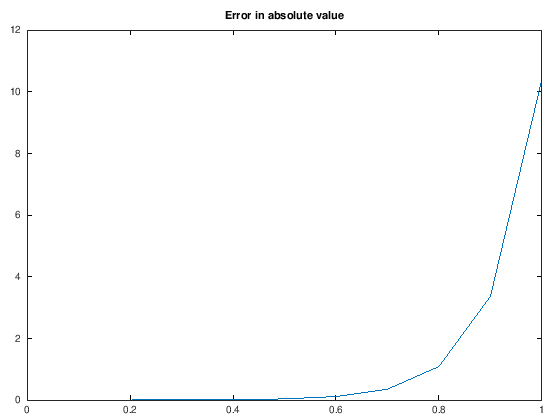

In [10]:
t=linspace(0,1,11);h=1/10;
y(1)=1; y(2)=exp(-h);
for i=3:11
    y(i)=4*y(i-1)-(3-2*h)*y(i-2);
end
y;
exp(-t);
abs(y-exp(-t))
plot(t,abs(y-exp(-t)))
title('Error in absolute value')

<br>

<b>Problem 5.</b> [Assignment] Write a code which decides whether the LMM is strongly or weakly stable.<br><br>

Test your code on the following LMMs.<br><br>

(a) $y_n+4y_{n-1}-5y_{n-2}=h(4f_{n-1}+2f_{n-2})$<br>
(b) $y_n-y_{n-2}=\frac{h}{2}(f_n+4f_{n-1}+f_{n-2})$<br>
(c) $y_n-\frac{4}{3}y_{n-1}+\frac{1}{3}y_{n-2}=\frac{2}{3}hf_n$

In [28]:
format long
a=[1 4 -5];
b=[1 0 1/2];
c=[1 -4/3 1/3];
d=[1 -1/2 1 1/2]; %Additional interesting case #1
e=[1 -1 1 -1]; %Additional interesting case #2
f=[1 0 -1]; %Additional interesting case #2
strongweakstability(c);

the_roots =

   1.000000000000000
   0.333333333333333

The LMM is strongly stable.


In [31]:
strongweakstability(e);
strongweakstability(f);

the_roots =

   1.000000000000001 + 0.000000000000000i
   0.000000000000001 + 1.000000000000000i
   0.000000000000001 - 1.000000000000000i

The LMM is neither strongly nor weakly stable.
the_roots =

  -1
   1

The LMM is weakly stable.


<br>
<b>Problem 6.</b> Prove that the Adams methods are strongly stable LMMs.
<br>
<br><br>

### Absolute stability regions, first and second Dahlquist barriers
<br>
<center>
<i>"I didn’t like all these “strong”, “perfect”, “absolute”,
“generalized”, “super”, “hyper”, “complete” and so on
in mathematical definitions, I wanted something neutral;
and having been impressed by David Young’s “property
A”, I chose the term “A-stable”."</i><br>
(G. Dahlquist, 1979)
</center>
<br>
<br>
<u>Theorem (First Dahlquist Barrier)</u>. For a zero-stable $k$-step LMM the order of convergence is

+ $p\leq k+2$, if $k$ even (implicit)<br>
+ $p\leq k+1$, if $k$ odd (implicit)<br>
+ $p\leq k$, if $\beta_k / \alpha_k\leq 0$ (explicit)<br>
<br>
<br>
<center>
<i>"I searched for a long time, finally Professor Lax showed me the
Riesz-Herglotz theorem and I knew that I had my theorem."</i><br>
(G. Dahlquist 1979)
</center>
<br>
<br>

<u>Theorem (Second Dahlquist Barrier)</u>. If the LMM is A-stable, then $\text{Re}\big(\frac{\rho(\xi)}{\sigma(\xi)}\big)>0$ for all $|\xi|>1$. For irreduible methods A-stability follows.<br>

<u>Theorem (Second Dahlquist Barrier)</u>. For an A-stable LMM we have $p\leq 2$. If $p=2$, then the estimate for its error constant is $C\leq -1/12$. The trapezoidal rule has the smallest error constant (C=-1/12) amongst the A-stable LMMs of order 2.
<br>

<br>
<b>Problem 7.</b> Determine the characteristic polynomial $\pi(\xi)$ and plot the corresponding absolute stability region of the following Adams and BDF LMMs.

<br>
(a) AB2 $y_{n+1}=y_n+h\left(\frac{3}{2}f_{n}-\frac{1}{2}f_{n-1}\right)$ <br>
(b) AB4 $y_{n+1}=y_{n}+h\left(\frac{55}{24}f_{n}-\frac{59}{24}f_{n-1}+\frac{37}{24}f_{n-2}-\frac{9}{24}f_{n-3}\right)$ <br>
(c) AM3 $y_{n+1}=y_{n}+h\left(\frac{5}{12}f_{n+1}+\frac{8}{12}f_{n}-\frac{1}{12}f_{n-1}\right)$ <br>
(d) AM5 $y_{n+1}=y_{n}+h\left(\frac{251}{720}f_{n+1}+\frac{646}{720}f_{n}-\frac{264}{720}f_{n-1}+\frac{106}{720}f_{n-2}-\frac{19}{720}f_{n-3}\right)$ <br>
(e) BDF2 $y_{n+1}=\frac{4}{3}y_{n}-\frac{1}{3}y_{n-1}+\frac{2}{3}hf_{n+1}$ <br>
(f) BDF3 $y_{n+1}=\frac{18}{11}y_{n}-\frac{9}{11}y_{n-1}+\frac{2}{11}y_{n-2}+\frac{6}{11}hf_{n+1}$ <br>

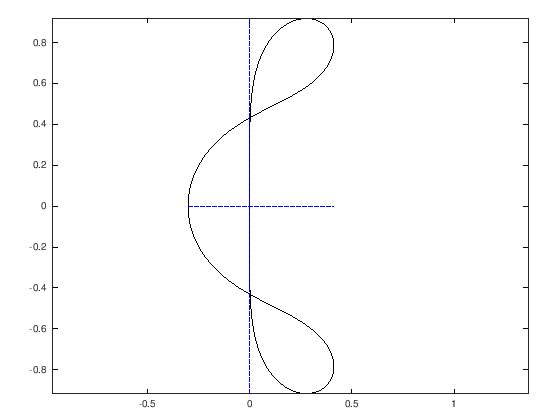

In [4]:
LW = 'LineWidth'; lw = 1;
clr = [221 221 221]/255;
% Defining the unit circle
N = 1000;
theta = linspace(0,2*pi,N);
xi = exp(1i*theta);

% The characteristic polynomial for \pi(xi)=0
%f = @(xi)(2*xi.^2-2*xi)./(3*xi-1); % AB2
%f=@(xi)(12*(xi.^3-xi.^2))./(23*xi.^2-16*xi+5); %AB3
f=@(xi) 24*(xi.^4-xi.^3)./(55*xi.^3 - 59*xi.^2 + 37*xi - 9); %AB4 %%fill(real(z(real(z)<=0)),imag(z(real(z)<=0)),clr)
%f=@(xi)(12*(xi.^2-xi))./(5*xi.^2+8*xi-1); %AM3
%f=@(xi)(12*(xi.^2-xi))./(5*xi.^2+8*xi-1); %AM5
%f=@(xi)(3*xi.^2-4*xi+1)./(2*xi.^2); %BDF2
%f=@(xi)(11*xi.^3-18*xi.^2+9*xi-2)./(6*xi.^3); %BDF3

% Plot
z = f(xi);
plot(z,'k-',LW,lw), hold on
%fill(real(z),imag(z),clr)
plot([min(real(z)) max(real(z))],[0 0],'b--',LW,lw)
plot([0 0],[min(imag(z)) max(imag(z))],'b--',LW,lw)
axis tight, axis equal, hold off

In [10]:
z=0.25-0.8i;
AB4=[1 (-1-z*55/24) z*59/24 -z*37/24 z*9/24]
roots(AB4)
abs(roots(AB4))

AB4 =

 Columns 1 through 3:

   1.00000 + 0.00000i  -1.57292 + 1.83333i   0.61458 - 1.96667i

 Columns 4 and 5:

  -0.38542 + 1.23333i   0.09375 - 0.30000i

ans =

   0.26209 - 1.36166i
   0.71910 - 0.89789i
   0.21860 + 0.47567i
   0.37314 - 0.04945i

ans =

   1.38665
   1.15035
   0.52349
   0.37640



In [34]:
z=-1-0.8i;
BDF3=[(11-z*6) -18 9 -2]
roots(BDF3)
abs(roots(BDF3))

BDF3 =

 Columns 1 through 3:

   17.0000 +  4.8000i  -18.0000 +  0.0000i    9.0000 +  0.0000i

 Column 4:

   -2.0000 +  0.0000i

ans =

   0.33781 - 0.53889i
   0.39884 - 0.09665i
   0.24399 + 0.35865i

ans =

   0.63602
   0.41038
   0.43378

